Γεώργιος Παπαϊωαννου - 1115202100222

**Υλοποίηση Α: Κυρτό περίβλημα.**
- Αυξητικό αλγόριθμο

In [2]:
# BASED ON SLIDES [2] PAGE 12 ALGORITHM
def cross_product(o, a, b):
    # CROSS PRODUCT OF OA OB
    return (a[0] - o[0]) * (b[1] - o[1]) - (a[1] - o[1]) * (b[0] - o[0])

def right_turn(p1, p2, p3):
    # RIGHT TURN CHECK W 3 POINTS
    return cross_product(p1, p2, p3) < 0

def incremental_convex_hull(points):
    # STEP 1
    points.sort(key=lambda x: (x[0], x[1]))
    n = len(points)
    
    if n < 3:
        return points  # INVALID
    
    # STEP 2
    upper_hull = [points[0], points[1]]
    
    # STEPS 3-6
    for i in range(2, n):
        upper_hull.append(points[i])
        while len(upper_hull) > 2 and not right_turn(upper_hull[-3], upper_hull[-2], upper_hull[-1]):
            upper_hull.pop(-2)  # POP THE MIDDLE
    
    # STEP 7
    lower_hull = [points[-1], points[-2]]
    
    # STEPS 8-11
    for i in range(n-3, -1, -1):
        lower_hull.append(points[i])
        while len(lower_hull) > 2 and not right_turn(lower_hull[-3], lower_hull[-2], lower_hull[-1]):
            lower_hull.pop(-2)  # POP THE MIDDLE
    
    # STEP 12
    lower_hull.pop(0)
    lower_hull.pop(-1)
    
    # STEP 13
    convex_hull = upper_hull + lower_hull
    
    # STEP 14
    return convex_hull

- Αλγόριθμος περιτυλίγματος

In [3]:
def find_leftmost_point(points): # STEP 1
    return min(points, key=lambda p: (p[0], p[1]))

def distance_squared(a, b):
    return (a[0] - b[0])**2 + (a[1] - b[1])**2

def gift_wrapping_convex_hull(points, cross_product, right_turn):
    if len(points) < 3:
        return points

    hull = [] # STEP 2
    leftmost_point = find_leftmost_point(points) # STEP 1
    current_point = leftmost_point

    while True:
        hull.append(current_point)
        next_point = points[0] if current_point != points[0] else points[1]
        for p in points: # STEP 3
            if p == current_point:
                continue
            # CW(r, u, t)
            if right_turn(current_point, next_point, p) or \
               (cross_product(current_point, next_point, p) == 0 and \
                distance_squared(current_point, p) > distance_squared(current_point, next_point)):
                next_point = p
        current_point = next_point 
        if current_point == leftmost_point: # STEP 4
            break

    return hull



- Αλγόριθμο Διαίρει και Βασίλευε

In [10]:
def divide_and_conquer_convex_hull(points):
    if len(points) <= 3:
        return gift_wrapping_convex_hull(points, cross_product, right_turn)

    points.sort(key=lambda point: point[0])
    mid = len(points) // 2
    left_hull = divide_and_conquer_convex_hull(points[:mid])
    right_hull = divide_and_conquer_convex_hull(points[mid:])
    
    return merge_hulls(left_hull, right_hull)

def find_bridge(hull1, hull2, is_upper):
    def cross_product(o, a, b):
        return (a[0] - o[0]) * (b[1] - o[1]) - (a[1] - o[1]) * (b[0] - o[0])

    def direction(p, q, r):
        cp = cross_product(p, q, r)
        return cp < 0 if is_upper else cp > 0

    p1, p2 = max(hull1, key=lambda p: p[0]), min(hull2, key=lambda p: p[0])
    while True:
        updated = False
        while direction(p1, p2, hull2[(hull2.index(p2) + 1) % len(hull2)]):
            p2 = hull2[(hull2.index(p2) + 1) % len(hull2)]
            updated = True
        while direction(p2, p1, hull1[(hull1.index(p1) - 1) % len(hull1)]):
            p1 = hull1[(hull1.index(p1) - 1) % len(hull1)]
            updated = True
        if not updated:
            break
    return p1, p2

def merge_hulls(hull1, hull2):
    upper_p1, upper_p2 = find_bridge(hull1, hull2, True)
    lower_p1, lower_p2 = find_bridge(hull1, hull2, False)

    hull = []
    add = False
    for p in hull1:
        if p == upper_p1 or p == lower_p1:
            add = not add
            hull.append(p)
        elif add:
            hull.append(p)
    add = False
    for p in hull2:
        if p == upper_p2 or p == lower_p2:
            add = not add
            hull.append(p)
        elif add:
            hull.append(p)
    return hull


- Αλγόριθμος QuickHull.

In [8]:
import numpy as np

def distance_from_line(p1, p2, p):
    p1, p2, p = np.array(p1), np.array(p2), np.array(p)
    return np.abs(np.cross(p2-p1, p1-p)) / np.linalg.norm(p2-p1)

def right_side_of_line(A, C, point):
    return (C[0] - A[0]) * (point[1] - A[1]) - (C[1] - A[1]) * (point[0] - A[0]) > 0

def QuickHull(A, B, S):
    if not S:
        return [A, B]
    else:
        C = max(S, key=lambda point: distance_from_line(A, B, point))
        M = [point for point in S if right_side_of_line(A, C, point)]
        N = [point for point in S if right_side_of_line(C, B, point)]
        return QuickHull(A, C, M)[:-1] + QuickHull(C, B, N)

**2.** Θεωρείστε 120 τυχαία σημεία στο επίπεδο σε γενική θέση. Να βρείτε
το κυρτό περίβλημα αυτών των σημείων χρησιμοποιώντας τους παραπάνω
αλγορίθμους. Να παρουσιάσετε τα αποτελέσματα σχηματικά. Υπάρχει
διαφορά στα αποτελέσματα;

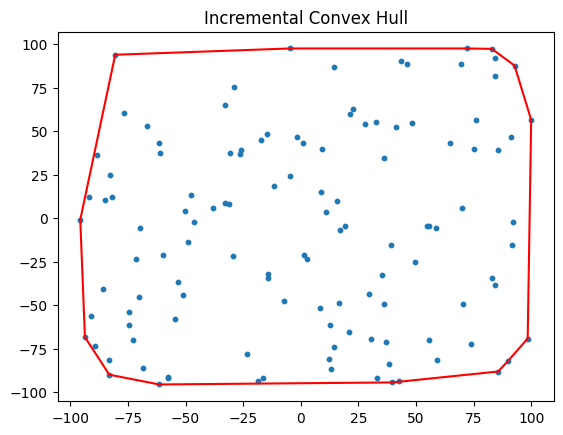

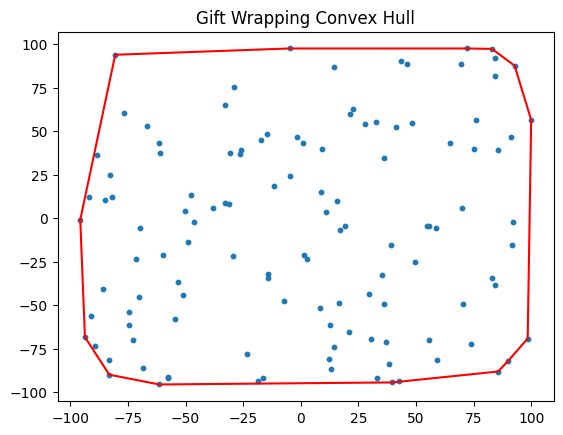

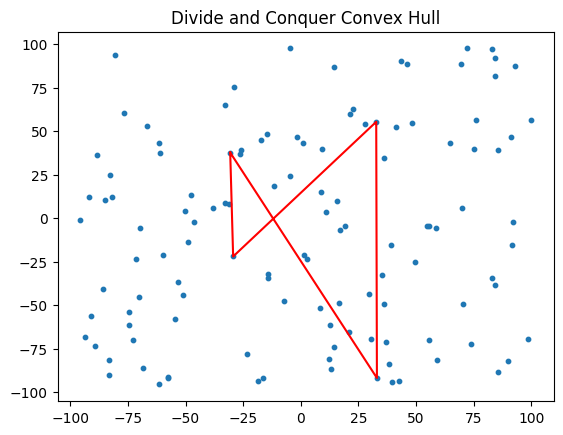

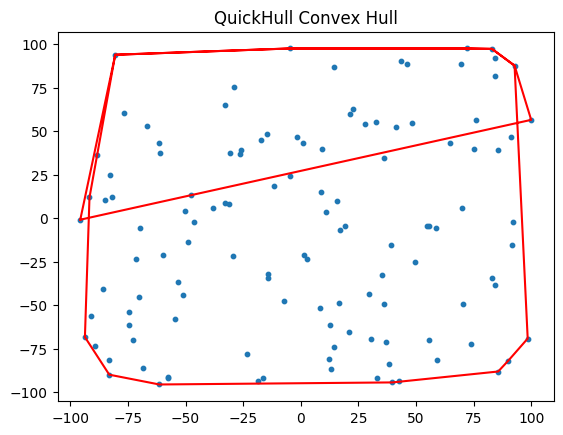

In [20]:
import matplotlib.pyplot as plt
import random

# 120 POINTS
points = [(random.uniform(-100, 100), random.uniform(-100, 100)) for _ in range(120)]

# Assuming the functions are defined as in your notebook:
# incremental_convex_hull, gift_wrapping_convex_hull, divide_and_conquer_convex_hull

# Calculate convex hulls
incremental_hull = incremental_convex_hull(points)
gift_wrapping_hull = gift_wrapping_convex_hull(points, cross_product, right_turn)
divide_and_conquer_hull = divide_and_conquer_convex_hull(points)


# QUICKHULL

A = min(points, key=lambda point: point[0])
B = max(points, key=lambda point: point[0])

S = [point for point in points if point not in [A, B]]

hull_points = QuickHull(A, B, S)

# Function to plot points and hull
def plot_hull(points, hull, title):
    plt.figure()
    x, y = zip(*points)
    plt.scatter(x, y, s=10)
    hull.append(hull[0])  # to close the hull
    hx, hy = zip(*hull)
    plt.plot(hx, hy, 'r-')
    plt.title(title)
    plt.show()

# Plot results
plot_hull(points, incremental_hull, "Incremental Convex Hull")
plot_hull(points, gift_wrapping_hull, "Gift Wrapping Convex Hull")
plot_hull(points, divide_and_conquer_hull, "Divide and Conquer Convex Hull")
plot_hull(points, hull_points, "QuickHull Convex Hull")